In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [3]:
data = pd.read_csv("invasion.csv")
X_train = data.drop(columns='class')
y_train = data['class']
X_test = pd.read_csv("operative_information.csv")

In [38]:
data.columns

Index(['class', 'g_reflection', 'i_reflection', 'speed', 'brightness',
       'time_of_observance', 'volume'],
      dtype='object')

In [17]:
clf_rf = RandomForestClassifier()
params = {'n_estimators' : [3, 5, 7, 10, 20], "min_samples_leaf": [2, 4, 10], "min_samples_split" : [2, 4, 10]}
search = GridSearchCV(clf_rf, param_grid=params, cv = 5)
search.fit(X_train, y_train)

In [53]:
best_rf =search.best_estimator_
prediction = pd.DataFrame(best_rf.predict(X_test), columns=['class'])
prediction.value_counts()

class    
fighter      675
transport    595
cruiser      230
dtype: int64

<AxesSubplot:>

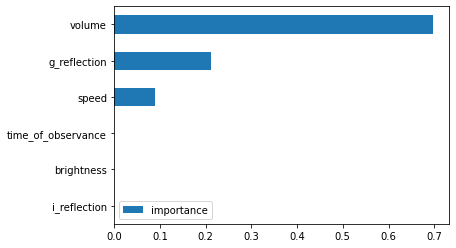

In [60]:
feature_importance = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=["importance"])
feature_importance.sort_values(by="importance").plot(kind='barh')

In [63]:
space_data = pd.read_csv("space_can_be_a_dangerous_place.csv")
space_data.columns

Index(['r', 'phi', 'peradventure_index', 'dustiness', 'black_hole_is_near',
       'buggers_were_noticed', 'nearby_system_has_planemo', 'dangerous'],
      dtype='object')

In [67]:
X = space_data.drop(columns = ['dangerous'])
y = space_data.dangerous

In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
searcher = GridSearchCV(clf, param_grid={"max_depth": range(1, 10), "min_samples_leaf": [2, 5, 10]}, cv = 3)
searcher.fit(X, y)
best = searcher.best_estimator_

In [84]:
pd.DataFrame(best.feature_importances_, index = X.columns, columns=["importance"]).sort_values(by = "importance")

,importance
r,0.000000
phi,0.000000
peradventure_index,0.000000
dustiness,0.000000
black_hole_is_near,0.017943
nearby_system_has_planemo,0.427127
buggers_were_noticed,0.554931
